<a href="https://colab.research.google.com/github/jesusalvarado2023/OpenCV_curso/blob/main/2_Taller_Intro_Imagenes_DUPD2025_DESARROLLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://miro.medium.com/v2/resize:fit:1400/1*zomnCz8-VMgrSV8eLCx2tw.gif" width="200" alt="molecula"  />

$$\Large \textit{Cuaderno de Código | Taller Nº 1}$$

---
$$\large\textbf{2. Desarrollo del Modelo Clasificador}$$

---
$$\textit{Curso: Aplicaciones de IA en Imágenes para Docentes Universitarios}$$

<br>
<br>

__Dr. Jesus Alvarado-Huayhuaz__

# Convolutional Neural Networks

# Importar Librerías

In [ ]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
import keras
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, BatchNormalization, Conv2D, MaxPooling2D, LeakyReLU

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


/content/drive/MyDrive/2025_2/VISION_DUPD/Base_de_datos

# Cargar set de Imágenes

In [ ]:
%cd /content/drive/MyDrive/2025_2/VISION_DUPD/Base_de_datos

/content/drive/MyDrive/2025_2/VISION_DUPD/Base_de_datos


In [ ]:
!ls

aprendeml-book-extras.zip  aprendeml.epub  aprendeml.pdf  sportimages.zip


In [ ]:
!unzip -uq 'sportimages.zip' -d 'sportimages'

13.22-13:28

In [ ]:
dirname = os.path.join(os.getcwd(), 'sportimages')
imgpath = dirname + os.sep

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  /content/drive/MyDrive/2025_2/VISION_DUPD/Base_de_datos/sportimages/
/content/drive/MyDrive/2025_2/VISION_DUPD/Base_de_datos/sportimages/sportimages/golf 1
/content/drive/MyDrive/2025_2/VISION_DUPD/Base_de_datos/sportimages/sportimages/basket 9768
/content/drive/MyDrive/2025_2/VISION_DUPD/Base_de_datos/sportimages/sportimages/tenis 8823
/content/drive/MyDrive/2025_2/VISION_DUPD/Base_de_datos/sportimages/sportimages/natacion 8937
/content/drive/MyDrive/2025_2/VISION_DUPD/Base_de_datos/sportimages/sportimages/ciclismo 5172
/content/drive/MyDrive/2025_2/VISION_DUPD/Base_de_datos/sportimages/sportimages/beisball 7533
/content/drive/MyDrive/2025_2/VISION_DUPD/Base_de_datos/sportimages/sportimages/futbol 7752
/content/drive/MyDrive/2025_2/VISION_DUPD/Base_de_datos/sportimages/sportimages/americano 7617
/content/drive/MyDrive/2025_2/VISION_DUPD/Base_de_datos/sportimages/sportimages/f1 9348
/content/drive/MyDrive/2025_2/VISION_DUPD/Base_de_datos/sportimages/sportimages/box

# Creamos las etiquetas

In [ ]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))

Cantidad etiquetas creadas:  77128


In [ ]:
deportes

['golf',
 'basket',
 'tenis',
 'natacion',
 'ciclismo',
 'beisball',
 'futbol',
 'americano',
 'f1',
 'boxeo']

In [ ]:
deportes=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    deportes.append(name[len(name)-1])
    indice=indice+1

0 golf
1 basket
2 tenis
3 natacion
4 ciclismo
5 beisball
6 futbol
7 americano
8 f1
9 boxeo


In [ ]:
y = np.array(labels)
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy

# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


# Creamos Sets de Entrenamiento y Test

In [ ]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (61702, 21, 28, 3) (61702,)
Testing data shape :  (15426, 21, 28, 3) (15426,)


Text(0.5, 1.0, 'Ground Truth : 7')

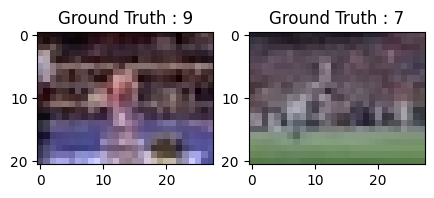

In [ ]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

# Preprocesamos las imagenes

In [ ]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

## Hacemos el One-hot Encoding para la red

In [ ]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


# Creamos el Set de Entrenamiento y Validación

In [ ]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [ ]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(49361, 21, 28, 3) (12341, 21, 28, 3) (49361, 10) (12341, 10)


# Creamos el modelo de CNN

In [ ]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = 1e-3 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 6 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 64 # cantidad de imágenes que se toman a la vez en memoria

In [ ]:
sport_model = Sequential()
sport_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(21,28,3)))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(MaxPooling2D((2, 2),padding='same'))
sport_model.add(Dropout(0.5))

sport_model.add(Flatten())
sport_model.add(Dense(32, activation='linear'))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(Dropout(0.5))
sport_model.add(Dense(nClasses, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [ ]:
sport_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 21, 28, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 21, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 11, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 11, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4928)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │       157,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 158,954 (620.91 KB)

 Trainable params: 158,954 (620.91 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
sport_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adagrad(learning_rate=INIT_LR, decay=INIT_LR / 100),metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


# Entrenamos el modelo: Aprende a clasificar imágenes

13:44-13:46

In [ ]:
# este paso puede tomar varios minutos, dependiendo de tu ordenador, cpu y memoria ram libre
# como ejemplo, en mi Macbook pro tarda 4 minutos
sport_train = sport_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/6
772/772 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.1637 - loss: 2.2399 - val_accuracy: 0.5236 - val_loss: 1.8398
Epoch 2/6
772/772 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.3528 - loss: 1.8748 - val_accuracy: 0.6241 - val_loss: 1.4907
Epoch 3/6
772/772 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.4392 - loss: 1.6367 - val_accuracy: 0.6648 - val_loss: 1.2881
Epoch 4/6
772/772 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.5011 - loss: 1.4777 - val_accuracy: 0.6926 - val_loss: 1.1469
Epoch 5/6
772/772 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.5389 - loss: 1.3656 - val_accuracy: 0.7273 - val_loss: 1.0556
Epoch 6/6
772/772 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.5626 - loss: 1.2909 - val_accuracy: 0.7412 - val_loss: 0.9818


In [ ]:
# guardamos la red, para reutilizarla en el futuro, sin tener que volver a entrenar
sport_model.save("sports_mnist.keras")

# Evaluamos la red

In [ ]:
test_eval = sport_model.evaluate(test_X, test_Y_one_hot, verbose=1)

483/483 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7367 - loss: 0.9973


In [ ]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.9860777258872986
Test accuracy: 0.743355393409729


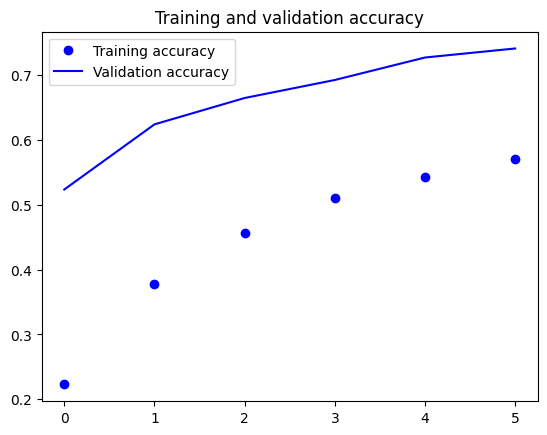

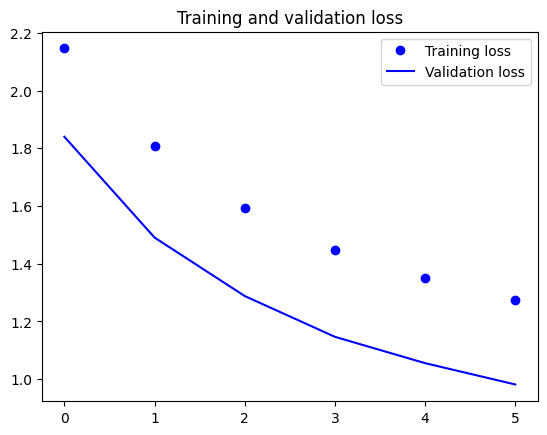

In [ ]:
accuracy = sport_train.history['accuracy']
val_accuracy = sport_train.history['val_accuracy']
loss = sport_train.history['loss']
val_loss = sport_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
predicted_classes2 = sport_model.predict(test_X)

483/483 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


In [ ]:
predicted_classes=[]
for predicted_sport in predicted_classes2:
    predicted_classes.append(predicted_sport.tolist().index(max(predicted_sport)))
predicted_classes=np.array(predicted_classes)

In [ ]:
predicted_classes.shape, test_Y.shape

((15426,), (15426,))

# Aprendamos de los errores: Qué mejorar

Found 11467 correct labels


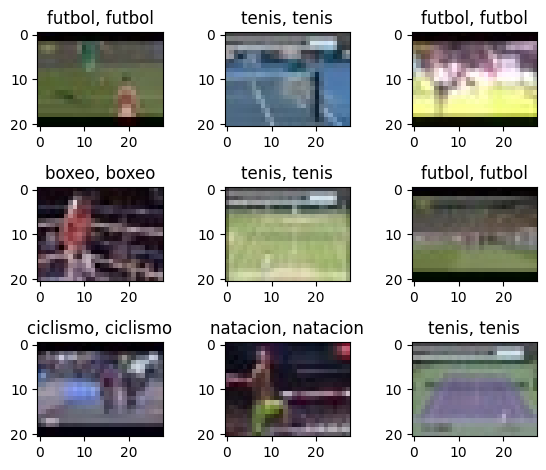

In [ ]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(21,28,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(deportes[predicted_classes[correct]],
                                                    deportes[test_Y[correct]]))

    plt.tight_layout()

Found 3959 incorrect labels


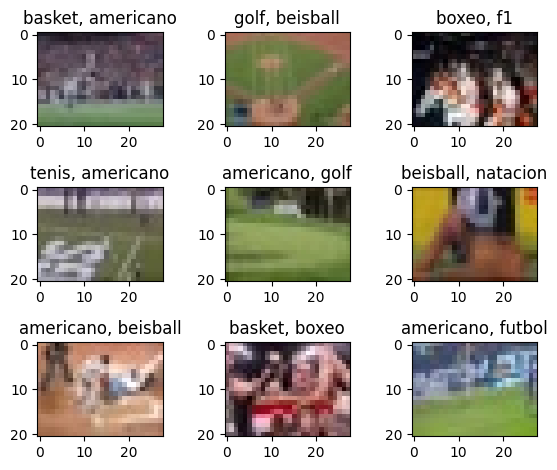

In [ ]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(21,28,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(deportes[predicted_classes[incorrect]],
                                                    deportes[test_Y[incorrect]]))
    plt.tight_layout()

In [ ]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.50      0.92      0.64      1973
     Class 1       0.67      0.82      0.74      1745
     Class 2       0.96      1.00      0.98      1776
     Class 3       0.93      0.91      0.92      1009
     Class 4       0.93      0.99      0.96      1493
     Class 5       0.85      0.47      0.61      1573
     Class 6       0.94      0.74      0.83      1544
     Class 7       0.56      0.49      0.52      1845
     Class 8       0.97      0.07      0.14      1018
     Class 9       0.82      0.84      0.83      1450

    accuracy                           0.74     15426
   macro avg       0.81      0.72      0.72     15426
weighted avg       0.79      0.74      0.73     15426



# Predicción de una nueva imagen

In [ ]:
from skimage.transform import resize

images=[]
# AQUI ESPECIFICAMOS UNAS IMAGENES
filenames = ['/content/drive/MyDrive/2025_2/VISION_DUPD/Base_de_datos/sportimages/sportimages/test/nueva_imagen_tenis.jpg',
             '/content/drive/MyDrive/2025_2/VISION_DUPD/Base_de_datos/sportimages/sportimages/test/nueva_imagen_natacion.jpg',
             ]

for filepath in filenames:
    image = plt.imread(filepath,0)
    image_resized = resize(image, (21, 28),anti_aliasing=True,clip=False,preserve_range=True)
    images.append(image_resized)

X = np.array(images, dtype=np.uint8) #convierto de lista a numpy
test_X = X.astype('float32')
test_X = test_X / 255.

predicted_classes = sport_model.predict(test_X)

for i, img_tagged in enumerate(predicted_classes):
    print(filenames[i], deportes[img_tagged.tolist().index(max(img_tagged))])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
/content/drive/MyDrive/2025_2/VISION_DUPD/Base_de_datos/sportimages/sportimages/test/nueva_imagen_tenis.jpg tenis
/content/drive/MyDrive/2025_2/VISION_DUPD/Base_de_datos/sportimages/sportimages/test/nueva_imagen_natacion.jpg natacion
